<a href="https://colab.research.google.com/github/itinho0712/Data_CVM/blob/main/codefordummie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

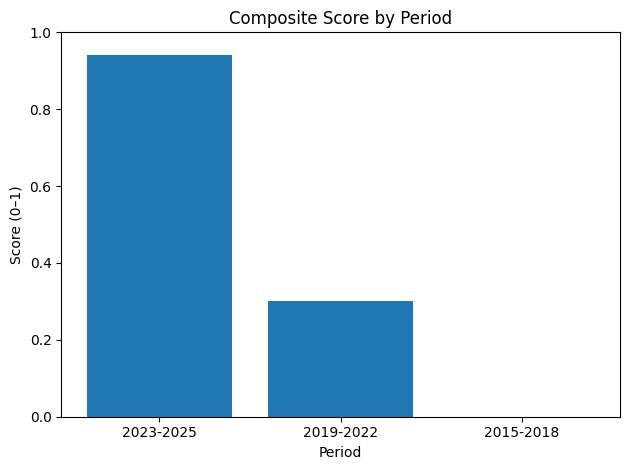

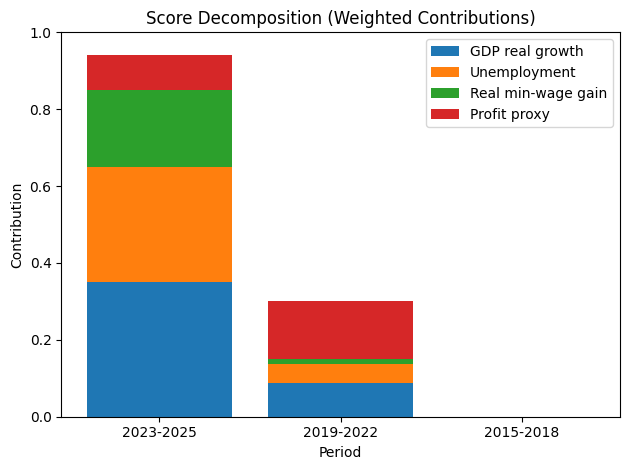

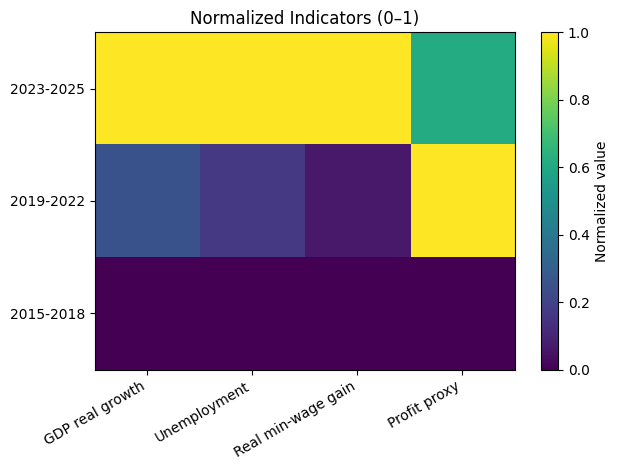

In [2]:
import matplotlib.pyplot as plt

data = {
    "2015-2018": {"gdp_real_cagr": -0.2, "unemployment_avg": 12.0, "min_wage_real_gain_avg": -0.3, "profit_proxy": 35.0},
    "2019-2022": {"gdp_real_cagr": 0.4, "unemployment_avg": 11.0, "min_wage_real_gain_avg": -0.2, "profit_proxy": 100.0},
    "2023-2025": {"gdp_real_cagr": 2.2, "unemployment_avg": 6.0, "min_wage_real_gain_avg": 1.2, "profit_proxy": 75.0},
}

spec = {
    "gdp_real_cagr": {"weight": 0.35, "higher_is_better": True,  "label": "GDP real growth"},
    "unemployment_avg": {"weight": 0.30, "higher_is_better": False, "label": "Unemployment"},
    "min_wage_real_gain_avg": {"weight": 0.20, "higher_is_better": True,  "label": "Real min-wage gain"},
    "profit_proxy": {"weight": 0.15, "higher_is_better": True,  "label": "Profit proxy"},
}

def normalize(x, lo, hi, higher_is_better=True):
    if hi == lo:
        return 0.5
    v = (x - lo) / (hi - lo)
    return v if higher_is_better else 1 - v

weights_sum = sum(v["weight"] for v in spec.values())
if abs(weights_sum - 1.0) > 1e-9:
    raise ValueError(f"Weights must sum to 1.0 (current: {weights_sum}).")

periods = list(data.keys())
keys = list(spec.keys())
labels = [spec[k]["label"] for k in keys]

mins_maxs = {}
for k in keys:
    vals = [data[p][k] for p in periods]
    mins_maxs[k] = (min(vals), max(vals))

results = {}
for p in periods:
    score = 0.0
    norm = {}
    contrib = {}
    for k in keys:
        lo, hi = mins_maxs[k]
        n = normalize(data[p][k], lo, hi, spec[k]["higher_is_better"])
        c = spec[k]["weight"] * n
        norm[k] = n
        contrib[k] = c
        score += c
    results[p] = {"score": score, "norm": norm, "contrib": contrib}

ranking = sorted(periods, key=lambda p: results[p]["score"], reverse=True)
scores = [results[p]["score"] for p in ranking]

plt.figure()
plt.bar(ranking, scores)
plt.title("Composite Score by Period")
plt.ylabel("Score (0–1)")
plt.xlabel("Period")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

plt.figure()
bottom = [0.0] * len(ranking)
for k, lab in zip(keys, labels):
    vals = [results[p]["contrib"][k] for p in ranking]
    plt.bar(ranking, vals, bottom=bottom, label=lab)
    bottom = [b + v for b, v in zip(bottom, vals)]
plt.title("Score Decomposition (Weighted Contributions)")
plt.ylabel("Contribution")
plt.xlabel("Period")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

matrix = [[results[p]["norm"][k] for k in keys] for p in ranking]
plt.figure()
plt.imshow(matrix, aspect="auto")
plt.title("Normalized Indicators (0–1)")
plt.yticks(range(len(ranking)), ranking)
plt.xticks(range(len(keys)), labels, rotation=30, ha="right")
plt.colorbar(label="Normalized value")
plt.tight_layout()
plt.show()
